**GALAPIA, XANDER SAM E.**

In [ ]:
class Graph():

    def __init__(self, graph_dict=None):

        if graph_dict == None:
            graph_dict = {}
        self._graph_dict = graph_dict

    def edges(self, vertice):
        return self._graph_dict[vertice]

    def all_vertices(self):
        return set(self._graph_dict.keys())

    def all_edges(self):
        return self.__generate_edges()

    def add_vertex(self, vertex):

        if vertex not in self._graph_dict:
            self._graph_dict[vertex] = []

    def add_edge(self, edge):
        edge = set(edge)
        vertex1, vertex2 = tuple(edge)
        for x, y in [(vertex1, vertex2), (vertex2, vertex1)]:
            if x in self._graph_dict:
                self._graph_dict[x].add(y)
            else:
                self._graph_dict[x] = [y]

    def generate_edge(self):
        edges = []
        for vertex in self._graph_dict:
            for neighbour in self._graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def print_graph(self):
        print("-------------------")
        for connect in self._graph_dict:
            connection = self._graph_dict[connect]
            print("Vertex",connect,"connects to",connection)

    def __iter__(self):
        self._iter_obj = iter(self._graph_dict)
        return self._iter_obj

    def __next__(self):
        return next(self._iter_obj)

    def __str__(self):
        res = "vertices: "
        for k in self._graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

    def find_path(self, start_vertex, end_vertex, path=None):
        if path == None:
            path = []
        graph = self._graph_dict
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return path
        if start_vertex not in graph:
            return None
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_path = self.find_path(vertex,
                                               end_vertex,
                                               path)
                if extended_path:
                    return extended_path
        return None

    def UnconChecking_graph(self):
        list_path = []
        for vertex in self._graph_dict:
            for next_vertex in self._graph_dict:
                if vertex != next_vertex:
                    path = self.find_path(vertex, next_vertex)
                    if path == None:
                        list_path.append(path)
                    elif path != None:
                        list_path.extend(path)
        if None in list_path:
           print("Yes")
        elif None not in list_path:
            print("No")



GraphDict = { "I" : ["II"],
      "II" : ["I", "III", "IV"],
      "III" : ["II", "IV", "V"],
      "IV" : ["II", "III", "VI"],
      "V" : ["III"],
      "VI" : ["IV"],
      "VII" : ["VIII"],
      "VIII" : ["VII"],
}

g = Graph(GraphDict)
g.print_graph()
print("Is the Graph Unconnected?")
g.UnconChecking_graph()

print("Vertices")
print(g.all_vertices())

-------------------
Vertex I connects to ['II']
Vertex II connects to ['I', 'III', 'IV']
Vertex III connects to ['II', 'IV', 'V']
Vertex IV connects to ['II', 'III', 'VI']
Vertex V connects to ['III']
Vertex VI connects to ['IV']
Vertex VII connects to ['VIII']
Vertex VIII connects to ['VII']
Is the Graph Unconnected?
Yes
Vertices
{'II', 'VI', 'VIII', 'V', 'IV', 'III', 'I', 'VII'}


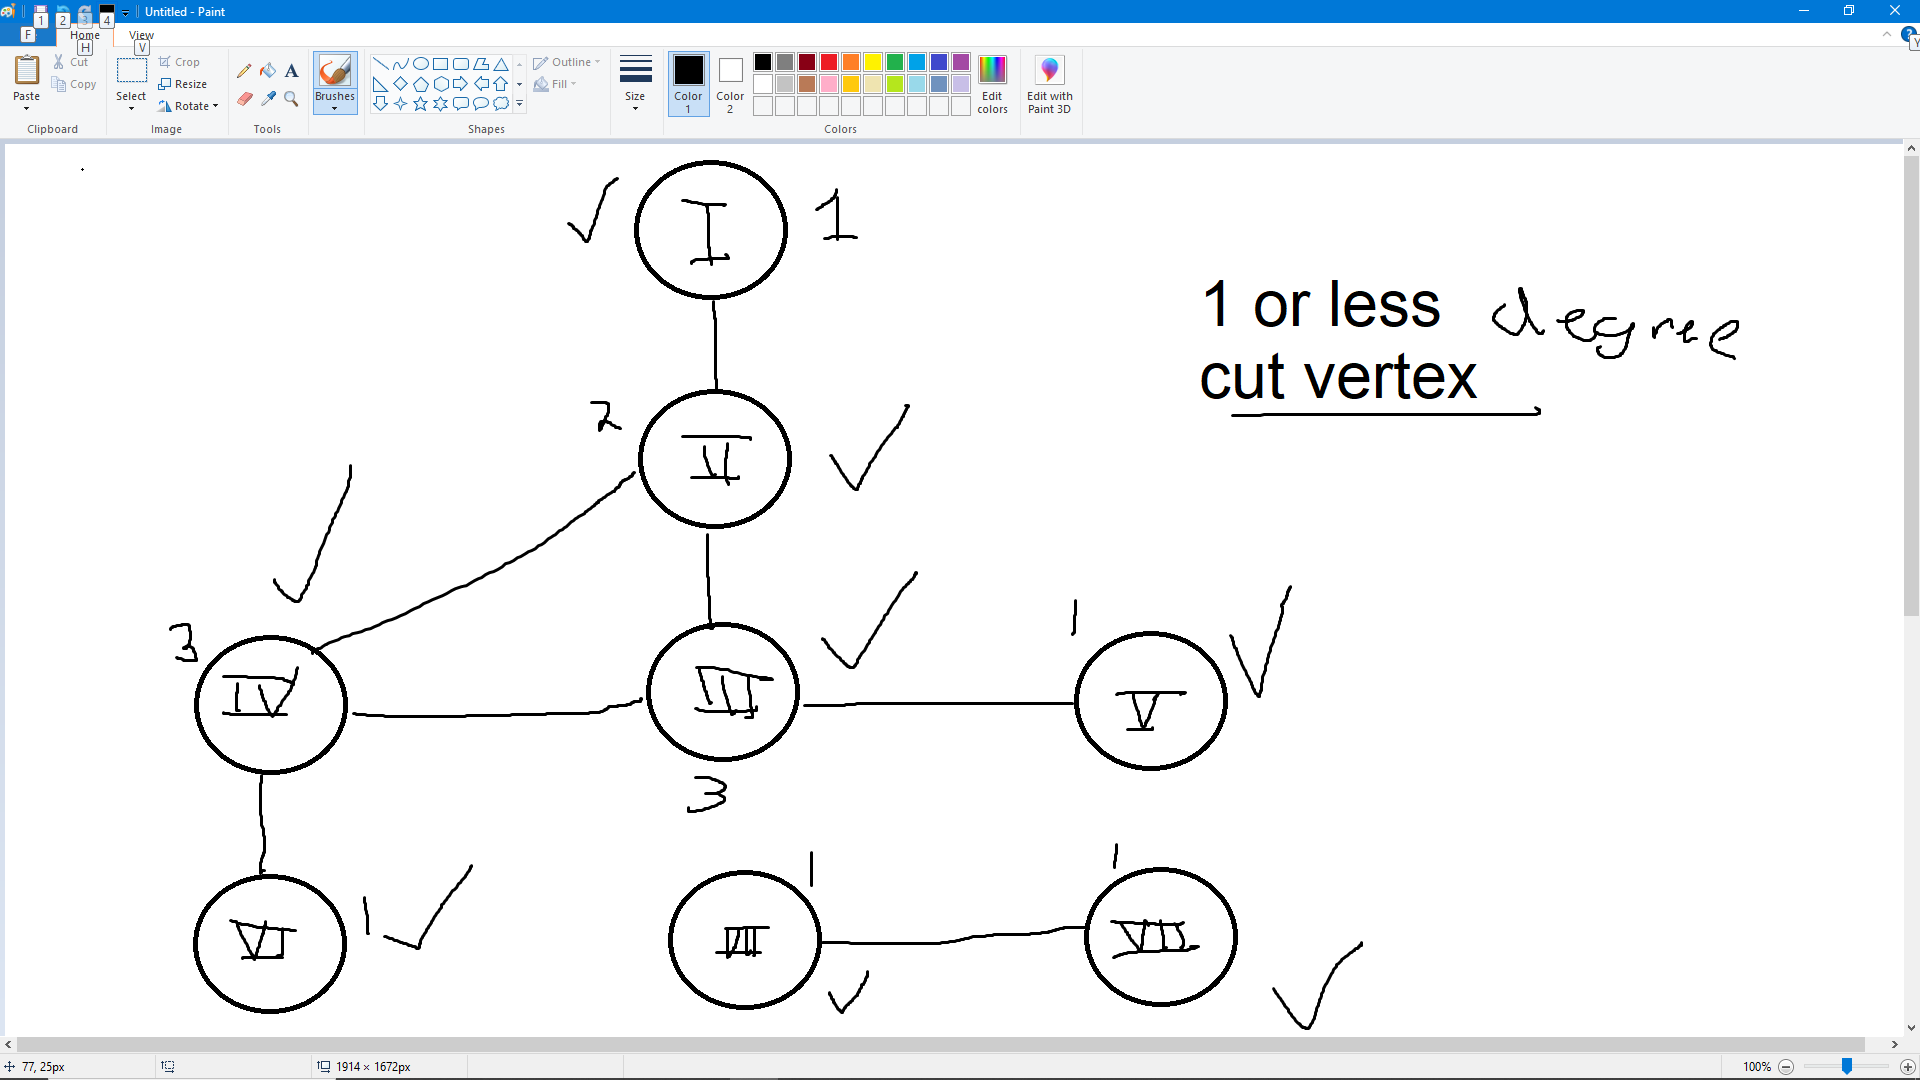